In [12]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
##Loading model
model = tf.keras.models.load_model('trained_model.keras')

In [14]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │        22,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,616,480 (59.57 MB)

 Trainable params: 7,808,239 (29.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,808,241 (29.79 MB)

In [15]:
## visualizing single image of test set
!pip install opencv-python

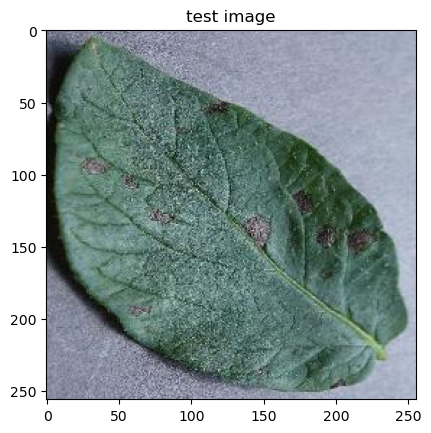

In [16]:
import cv2
image_path ="test/test/PotatoEarlyBlight3.JPG"
## reading image            in BGR format
img = cv2.imread(image_path)

## reading in rgb format              BGR to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## displaying image
plt.imshow(img)
plt.title("test image") 
plt.show()

In [17]:
## testing model (preprocessing)

In [18]:
##preprocessing in same way my model trained 128,128
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)     #convert simgle img to a batch
print(input_arr) #arr.shape

[[[105. 108. 125.]
  [108. 111. 128.]
  [128. 131. 148.]
  ...
  [168. 176. 195.]
  [168. 176. 195.]
  [166. 174. 193.]]

 [[ 95.  98. 115.]
  [122. 125. 142.]
  [127. 130. 147.]
  ...
  [166. 174. 193.]
  [162. 170. 189.]
  [157. 165. 184.]]

 [[106. 112. 128.]
  [112. 118. 134.]
  [ 83.  89. 105.]
  ...
  [163. 171. 190.]
  [164. 172. 191.]
  [166. 174. 193.]]

 ...

 [[146. 151. 171.]
  [129. 134. 154.]
  [145. 150. 170.]
  ...
  [174. 182. 201.]
  [172. 180. 199.]
  [180. 188. 207.]]

 [[138. 143. 163.]
  [131. 136. 156.]
  [137. 142. 162.]
  ...
  [172. 180. 199.]
  [176. 184. 203.]
  [180. 188. 207.]]

 [[114. 119. 139.]
  [146. 151. 171.]
  [139. 144. 164.]
  ...
  [175. 183. 202.]
  [173. 181. 200.]
  [169. 177. 196.]]]


In [19]:
prediction = model.predict(np.expand_dims(input_arr, axis=0))

prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


(array([[7.23552331e-02, 5.75051876e-03, 8.63102078e-01, 9.64893552e-04,
         3.97573086e-03, 4.72581276e-04, 1.82798773e-03, 7.56973820e-03,
         9.72599722e-03, 4.95195575e-03, 4.16689174e-04, 7.03314645e-03,
         1.96663692e-04, 1.12118553e-02, 1.04449345e-02]], dtype=float32),
 (1, 15))

In [20]:
result_index = np.argmax(prediction)       #max index of the matrix of this prediction (mathing 8.4312719)
result_index


2

In [21]:
#to find class name  (val_set, potato_Late_blight -- index 1)
class_name = ['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

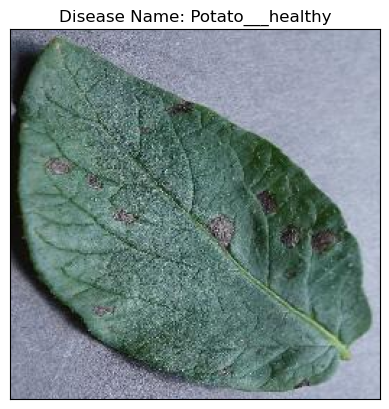

In [22]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()